In [5]:
# Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [8]:
# loading the datasets 
movies_data=pd.read_csv('C:/Users/LENOVO/Downloads/movies.dat', sep='::',engine='python',encoding='latin-1',names=['Movieid','Title','Genres'])
movies_data.head()

,Movieid,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
movies_data.shape

(3883, 3)

In [10]:
users_data=pd.read_csv('C:/Users/LENOVO/Downloads/users.dat', sep='::', engine='python', encoding='latin-1',names=['Userid','Gender','Age','Occupation','Zipcode'])
users_data.head()

,Userid,Gender,Age,Occupation,Zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [11]:
users_data.shape


(6040, 5)

In [12]:
ratings_data=pd.read_csv('C:/Users/LENOVO/Downloads/ratings.dat', sep='::',engine='python',encoding='latin-1',names=['Userid','Movieid','Ratings','Timestamp'])
ratings_data.head()

,Userid,Movieid,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [13]:
ratings_data.shape


(1000209, 4)

In [14]:
# merging movie data with respect to ratings data

ratings_data=movies_data.merge(ratings_data,on='Movieid',how='inner')
ratings_data.head()

,Movieid,Title,Genres,Userid,Ratings,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [15]:
# merging the ratings data with respect to users data and creating new data set

main_data=ratings_data.merge(users_data,on='Userid',how='inner')
main_data.head()

,Movieid,Title,Genres,Userid,Ratings,Timestamp,Gender,Age,Occupation,Zipcode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [16]:
main_data.shape


(1000209, 10)

In [17]:
main_data.isnull().sum() # checking for null values


Movieid       0
Title         0
Genres        0
Userid        0
Ratings       0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zipcode       0
dtype: int64

In [18]:
main_data.info() # checking the information about the dataset


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Movieid     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   Userid      1000209 non-null  int64 
 4   Ratings     1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zipcode     1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [20]:
# user ratings for a movies 

movie_rating=main_data[main_data['Title'].str.contains('Toy Story')]
movie_rating

,Movieid,Title,Genres,Userid,Ratings,Timestamp,Gender,Age,Occupation,Zipcode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
50,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1,4,978302174,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
...,...,...,...,...,...,...,...,...,...,...
998988,3114,Toy Story 2 (1999),Animation|Children's|Comedy,3023,4,970471948,F,25,7,92108
999027,3114,Toy Story 2 (1999),Animation|Children's|Comedy,5800,5,958015250,M,35,18,90804
999486,3114,Toy Story 2 (1999),Animation|Children's|Comedy,2189,4,974607816,M,1,10,60148
999869,3114,Toy Story 2 (1999),Animation|Children's|Comedy,159,4,989966944,F,45,0,37922


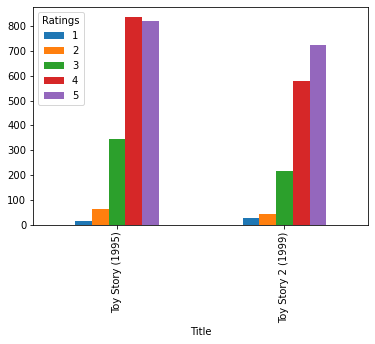

<Figure size 1080x576 with 0 Axes>

In [30]:
# visual representation

movie_rating.groupby(['Title','Ratings']).size().unstack().plot(kind='bar',stacked=False, legend=True)
plt.figure(figsize=(15,8))
plt.show()

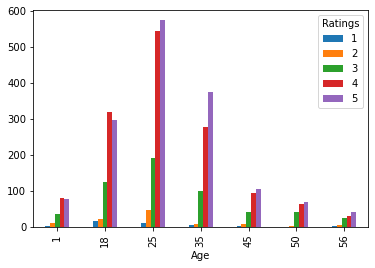

<Figure size 1440x576 with 0 Axes>

In [32]:
movie_rating.groupby(['Age','Ratings']).size().unstack().plot(kind='bar',stacked=False, legend=True)
plt.figure(figsize=(20,8))
plt.show()